In [70]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [109]:
np.random.seed(50)
pts = 50

In [110]:
x_vals = np.random.rand(50)
x_train = np.asarray(x_vals,dtype=np.float32).reshape(-1,1)
m = 1
alpha = np.random.rand(1)
beta = np.random.rand(1)
y_correct = np.asarray([2*i+m for i in x_vals], dtype=np.float32).reshape(-1,1)

In [111]:
beta

array([0.61673141])

In [112]:
class LinearRegressionModel(nn.Module):

    def __init__(self, input_dim, output_dim):

        super(LinearRegressionModel, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(input_dim, output_dim)
        # nn.linear is defined in nn.Module

    def forward(self, x):
        # Here the forward pass is simply a linear function

        out = self.linear(x)
        return out

input_dim = 1
output_dim = 1

In [113]:
model = LinearRegressionModel(input_dim,output_dim)# create our model just as we do in Scikit-Learn / C / C++//

criterion = nn.MSELoss()# Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) #Stochastic Gradient Descent

epochs = 2000

In [114]:
model.parameters

<bound method Module.parameters of LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)>

## Train the Model

In [115]:
a = inputs.t()
b = model.forward(inputs).t()

In [116]:
inputs.shape

torch.Size([50, 1])

In [117]:
criterion(inputs, labels).data

tensor(2.5234)

In [118]:
labels

tensor([[ 1.9892],
        [ 1.4562],
        [ 1.5109],
        [ 1.7927],
        [ 1.7546],
        [ 2.9931],
        [ 1.8164],
        [ 2.5438],
        [ 2.5211],
        [ 1.6200],
        [ 1.6931],
        [ 1.7035],
        [ 1.2909],
        [ 2.9453],
        [ 2.8184],
        [ 2.1199],
        [ 1.6272],
        [ 2.7764],
        [ 2.3491],
        [ 1.7822],
        [ 2.0144],
        [ 2.0482],
        [ 2.8560],
        [ 2.1427],
        [ 2.3367],
        [ 1.1045],
        [ 1.6541],
        [ 1.1128],
        [ 1.3597],
        [ 2.8519],
        [ 2.8760],
        [ 2.4282],
        [ 2.4654],
        [ 1.9235],
        [ 2.8627],
        [ 1.8128],
        [ 2.3664],
        [ 2.2998],
        [ 2.1975],
        [ 1.4441],
        [ 2.3647],
        [ 2.7561],
        [ 2.5934],
        [ 1.8640],
        [ 2.8358],
        [ 2.5637],
        [ 2.4515],
        [ 1.2497],
        [ 2.8326],
        [ 1.7754]])

In [119]:
for epoch in range(1000):

    epoch +=1
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_correct))

    #clear grads
    optimiser.zero_grad()
    #forward to get predicted values
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}, linear weight {}'.format(epoch,loss.data,model.state_dict()['linear.weight']))

epoch 1, loss 5.940560817718506, linear weight tensor([[ 0.5813]])
epoch 2, loss 5.627352237701416, linear weight tensor([[ 0.6098]])
epoch 3, loss 5.330681800842285, linear weight tensor([[ 0.6376]])
epoch 4, loss 5.04967737197876, linear weight tensor([[ 0.6647]])
epoch 5, loss 4.783511161804199, linear weight tensor([[ 0.6910]])
epoch 6, loss 4.531399250030518, linear weight tensor([[ 0.7167]])
epoch 7, loss 4.292601108551025, linear weight tensor([[ 0.7416]])
epoch 8, loss 4.066411018371582, linear weight tensor([[ 0.7659]])
epoch 9, loss 3.852166175842285, linear weight tensor([[ 0.7896]])
epoch 10, loss 3.649233818054199, linear weight tensor([[ 0.8127]])
epoch 11, loss 3.4570159912109375, linear weight tensor([[ 0.8351]])
epoch 12, loss 3.274948835372925, linear weight tensor([[ 0.8569]])
epoch 13, loss 3.102494716644287, linear weight tensor([[ 0.8782]])
epoch 14, loss 2.9391472339630127, linear weight tensor([[ 0.8989]])
epoch 15, loss 2.7844250202178955, linear weight tensor(

epoch 499, loss 0.003375425934791565, linear weight tensor([[ 1.7862]])
epoch 500, loss 0.0033681029453873634, linear weight tensor([[ 1.7864]])
epoch 501, loss 0.0033607936929911375, linear weight tensor([[ 1.7867]])
epoch 502, loss 0.003353501670062542, linear weight tensor([[ 1.7869]])
epoch 503, loss 0.003346224781125784, linear weight tensor([[ 1.7871]])
epoch 504, loss 0.0033389620948582888, linear weight tensor([[ 1.7874]])
epoch 505, loss 0.003331716638058424, linear weight tensor([[ 1.7876]])
epoch 506, loss 0.0033244870137423277, linear weight tensor([[ 1.7878]])
epoch 507, loss 0.0033172720577567816, linear weight tensor([[ 1.7880]])
epoch 508, loss 0.0033100745640695095, linear weight tensor([[ 1.7883]])
epoch 509, loss 0.0033028912730515003, linear weight tensor([[ 1.7885]])
epoch 510, loss 0.0032957252115011215, linear weight tensor([[ 1.7887]])
epoch 511, loss 0.0032885754480957985, linear weight tensor([[ 1.7890]])
epoch 512, loss 0.0032814382575452328, linear weight te

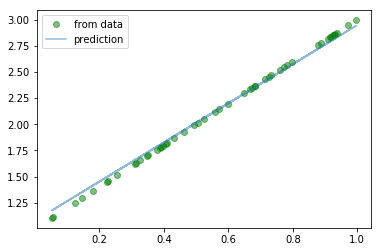

OrderedDict([('linear.weight', tensor([[ 1.8705]])), ('linear.bias', tensor([ 1.0775]))])


In [87]:
predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

In [53]:
for name, param in model.named_parameters():
    print(name, param.data)

linear.weight tensor([[ 1.8309]])
linear.bias tensor([ 1.1011])


odict_items([('linear.weight', tensor([[ 1.8309]])), ('linear.bias', tensor([ 1.1011]))])